## Threshold for condition:
We want to decide wether a problem is unique or non unique depending on this threshold. Note these threshold do not incorparate the supremum into the upper bound of the condition. Which means they are not exact, but might be a well enough approximation.

### Non uniqueness

 We choose the threshoold $T$ as 
 $$T = \frac{\tilde{\sigma}_1}{\sqrt{E}} $$
where $E = m(C_m \frac{\epsilon}{h} + h^{order} M C_a)^2 + \|u-\tilde{u}\|_2^2$ and $\epsilon = \|u-u_{noise}\|_{\infty} + 10^{-16}$ and $h=dx$. If a value is bigger than T the function u should be nonunique.

In [1]:
import numpy as np
from numpy.linalg import matrix_rank, svd
import sys
sys.path.append('../')
from test_data import experiment_data,add_noise,create_data_2d
import pysindy as ps
import matplotlib.pyplot as plt
from error_bounds import *

In [2]:
"""
Calculates the approximate threshold (ignores all constants above)
eps:   upper bound |u-u_noise|_infty
h:     space between data points
order: order of finite difference method
"""
def calc_threshold_nonuniq_approx(eps,h,order=2):
    eps+=np.finfo(float).eps # add machine precisoin
    return 1/(eps/h+h**order)
"""
Calculates the exact threshold
eps_infty: upper bound |u-u_noise|_infty
eps_two:   upper bound |u-u_noise|_2
h:         space between data points
order:     order of finite difference method
number_datapoint: number of data_points
M:         upper bound on the (order+1)th derivative
"""
def calc_threshold_nonuniq_exact(omax,eps_two,eps_infty,h,number_datapoints,M,order=2): 
    E = error_bound_g(eps_two,eps_infty,h,number_datapoints,M,order)
    return omax/np.sqrt(E)

In [3]:
n_samples=50
T,X,t,x = create_data_2d(T_start=-5, T_end=1, L_x_start=0,L_x_end=1, N_t=n_samples, N_x=n_samples)
a=np.random.randn()

u = np.exp(X-a*T)
ux = u
uxx = u
uxxx = u
ut = -a*u

dx=x[1]-x[0]

In [4]:
u_flat, ux_flat = u.flatten(), ux.flatten()
true_g = np.concatenate([u_flat.reshape(len(u_flat),1), ux_flat.reshape(len(ux_flat),1)], axis=1)
sv = svd(true_g, compute_uv=False)
sv_max,sv_min=sv[0],sv[-1]
print(f"M: {np.max(u)}")
print(f"Singular values of g: {sv_max,sv_min}")
print(f"sv_max/sv_min: {sv_max/sv_min:3.3e}")

M: 39.647755943424926
Singular values of g: (745.1160926632592, 1.5823676562261988e-13)
sv_max/sv_min: 4.709e+15


In [5]:
u_flat, ux_flat = u.flatten(), ux.flatten()
true_g = np.concatenate([u_flat.reshape(len(u_flat),1), ux_flat.reshape(len(ux_flat),1)], axis=1)
sv = svd(true_g, compute_uv=False)
sv_max,sv_min=sv[0],sv[-1]
print(f"M: {np.max(u)}")
print(f"Singular values of g: {sv_max,sv_min}")
print(f"sv_max/sv_min: {sv_max/sv_min:3.3e}")

M: 39.647755943424926
Singular values of g: (745.1160926632592, 1.5823676562261988e-13)
sv_max/sv_min: 4.709e+15


True ratio: 4.709e+15
Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
0
0.0
	  	 2 	 	 4.352e+04 	 2.401e+03 	 	 5.415e+03
	  	 3 	 	 4.214e+06 	 1.176e+05 	 	 1.769e+05
	  	 4 	 	 2.803e+08 	 5.765e+06 	 	 6.500e+07
	  	 5 	 	 1.416e+10 	 2.825e+08 	 	 6.370e+08
	  	 6 	 	 8.492e+11 	 1.384e+10 	 	 7.276e+11
	  	 7 	 	 6.030e+13 	 6.733e+11 	 	 1.909e+12
	  	 8 	 	 4.863e+13 	 2.441e+13 	 	 6.068e+14
	  	 9 	 	 2.791e+13 	 8.700e+13 	 	 1.014e+13


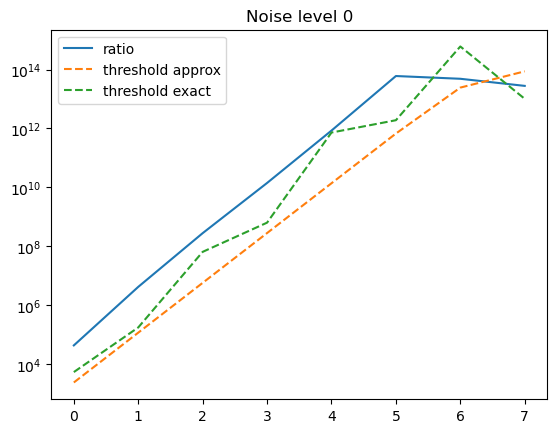

Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
1e-10
5.26690669813229e-08
	  	 2 	 	 4.352e+04 	 2.400e+03 	 	 5.415e+03
	  	 3 	 	 4.209e+06 	 1.148e+05 	 	 1.740e+05
	  	 4 	 	 2.018e+08 	 2.623e+06 	 	 2.754e+07
	  	 5 	 	 1.981e+08 	 4.731e+06 	 	 4.174e+06
	  	 6 	 	 1.435e+08 	 4.810e+06 	 	 3.911e+07
	  	 7 	 	 9.298e+07 	 4.811e+06 	 	 1.558e+06
	  	 8 	 	 5.838e+07 	 4.811e+06 	 	 3.441e+07
	  	 9 	 	 3.558e+07 	 4.811e+06 	 	 5.315e+05


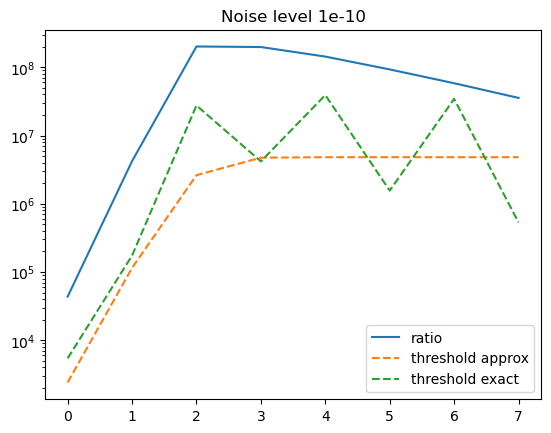

Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
1e-09
5.169232513003803e-07
	  	 2 	 	 4.352e+04 	 2.390e+03 	 	 5.411e+03
	  	 3 	 	 4.134e+06 	 9.582e+04 	 	 1.534e+05
	  	 4 	 	 2.860e+07 	 4.739e+05 	 	 4.755e+06
	  	 5 	 	 2.039e+07 	 5.154e+05 	 	 4.505e+05
	  	 6 	 	 1.463e+07 	 5.163e+05 	 	 4.197e+06
	  	 7 	 	 9.261e+06 	 5.164e+05 	 	 1.672e+05
	  	 8 	 	 5.691e+06 	 5.164e+05 	 	 3.694e+06
	  	 9 	 	 3.417e+06 	 5.164e+05 	 	 5.704e+04


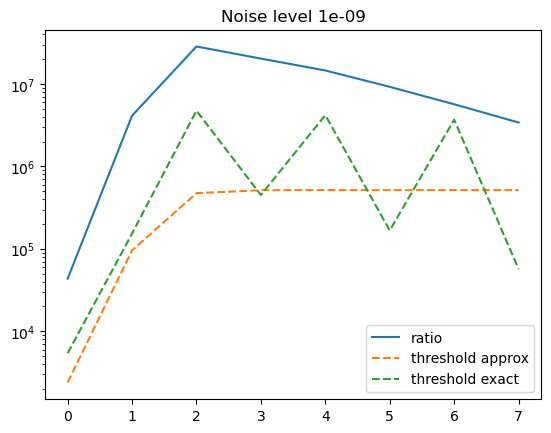

Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
1e-08
5.320111470183944e-06
	  	 2 	 	 4.351e+04 	 2.293e+03 	 	 5.377e+03
	  	 3 	 	 2.342e+06 	 3.559e+04 	 	 6.935e+04
	  	 4 	 	 2.724e+06 	 5.058e+04 	 	 5.031e+05
	  	 5 	 	 1.901e+06 	 5.102e+04 	 	 4.456e+04
	  	 6 	 	 1.344e+06 	 5.103e+04 	 	 4.148e+05
	  	 7 	 	 8.656e+05 	 5.103e+04 	 	 1.653e+04
	  	 8 	 	 5.465e+05 	 5.103e+04 	 	 3.650e+05
	  	 9 	 	 3.361e+05 	 5.103e+04 	 	 5.637e+03


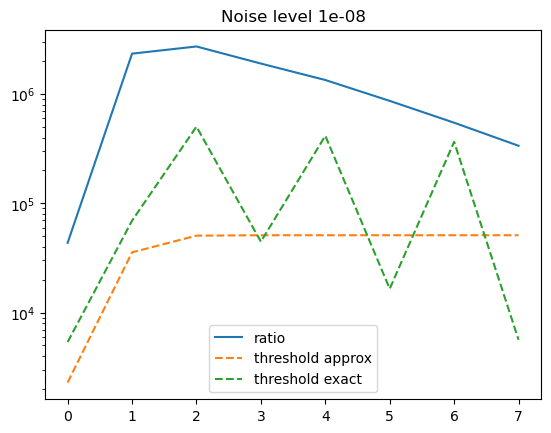

Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
1e-07
5.382005186382097e-05
	  	 2 	 	 4.358e+04 	 1.665e+03 	 	 5.075e+03
	  	 3 	 	 2.924e+05 	 5.193e+03 	 	 1.136e+04
	  	 4 	 	 2.833e+05 	 5.428e+03 	 	 5.393e+04
	  	 5 	 	 2.062e+05 	 5.433e+03 	 	 4.744e+03
	  	 6 	 	 1.557e+05 	 5.433e+03 	 	 4.416e+04
	  	 7 	 	 1.029e+05 	 5.433e+03 	 	 1.759e+03
	  	 8 	 	 6.410e+04 	 5.433e+03 	 	 3.886e+04
	  	 9 	 	 3.756e+04 	 5.433e+03 	 	 6.002e+02


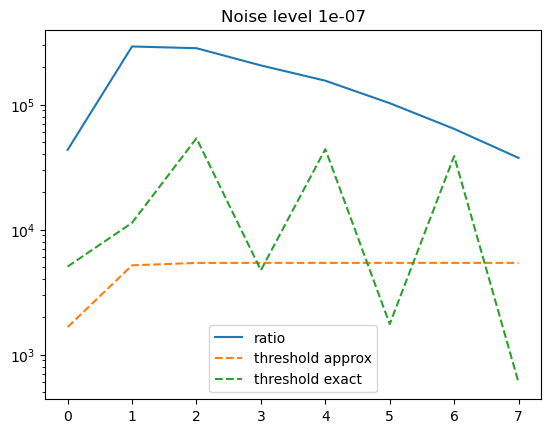

Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
1e-06
0.0005368009747347616
	  	 2 	 	 3.082e+04 	 4.218e+02 	 	 3.166e+03
	  	 3 	 	 2.755e+04 	 5.095e+02 	 	 1.136e+03
	  	 4 	 	 2.499e+04 	 5.116e+02 	 	 5.083e+03
	  	 5 	 	 1.831e+04 	 5.117e+02 	 	 4.468e+02
	  	 6 	 	 1.378e+04 	 5.117e+02 	 	 4.159e+03
	  	 7 	 	 9.352e+03 	 5.117e+02 	 	 1.657e+02
	  	 8 	 	 6.045e+03 	 5.117e+02 	 	 3.660e+03
	  	 9 	 	 3.718e+03 	 5.117e+02 	 	 5.652e+01


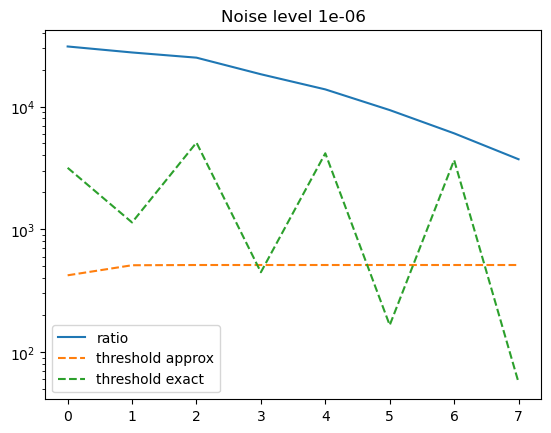

Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
1e-05
0.005227639732754738
	  	 2 	 	 4.856e+03 	 4.936e+01 	 	 6.596e+02
	  	 3 	 	 3.006e+03 	 5.038e+01 	 	 1.126e+02
	  	 4 	 	 2.898e+03 	 5.040e+01 	 	 5.007e+02
	  	 5 	 	 2.068e+03 	 5.040e+01 	 	 4.401e+01
	  	 6 	 	 1.494e+03 	 5.040e+01 	 	 4.097e+02
	  	 7 	 	 9.529e+02 	 5.040e+01 	 	 1.632e+01
	  	 8 	 	 5.862e+02 	 5.040e+01 	 	 3.605e+02
	  	 9 	 	 3.473e+02 	 5.040e+01 	 	 5.567e+00


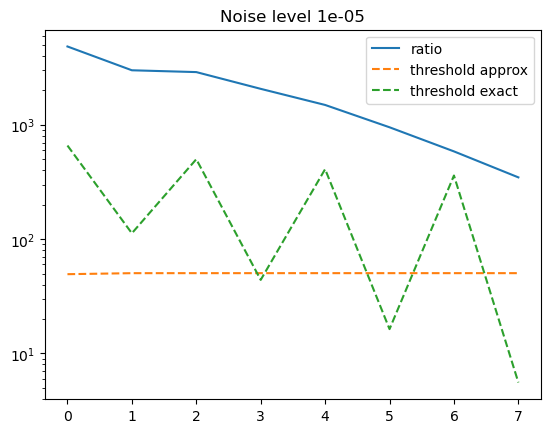

Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
0.0001
0.05335596243326765
	  	 2 	 	 4.800e+02 	 4.846e+00 	 	 7.141e+01
	  	 3 	 	 2.880e+02 	 4.855e+00 	 	 1.085e+01
	  	 4 	 	 2.610e+02 	 4.856e+00 	 	 4.825e+01
	  	 5 	 	 1.825e+02 	 4.856e+00 	 	 4.241e+00
	  	 6 	 	 1.343e+02 	 4.856e+00 	 	 3.948e+01
	  	 7 	 	 9.227e+01 	 4.856e+00 	 	 1.573e+00
	  	 8 	 	 6.161e+01 	 4.856e+00 	 	 3.476e+01
	  	 9 	 	 3.858e+01 	 4.856e+00 	 	 5.370e-01


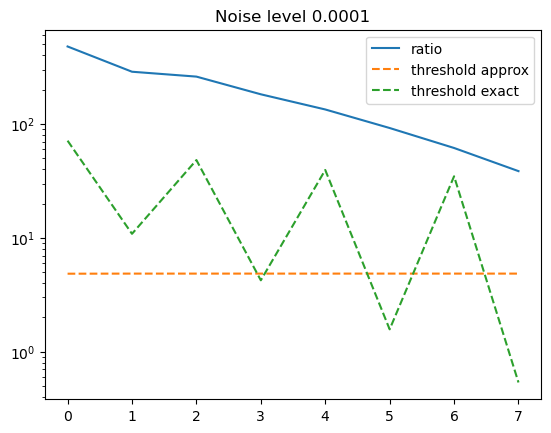

Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
0.001
0.5314447412850974
	  	 2 	 	 4.760e+01 	 4.802e-01 	 	 7.150e+00
	  	 3 	 	 2.971e+01 	 4.803e-01 	 	 1.074e+00
	  	 4 	 	 2.876e+01 	 4.803e-01 	 	 4.777e+00
	  	 5 	 	 2.069e+01 	 4.803e-01 	 	 4.203e-01
	  	 6 	 	 1.511e+01 	 4.803e-01 	 	 3.920e+00
	  	 7 	 	 9.765e+00 	 4.803e-01 	 	 1.568e-01
	  	 8 	 	 6.214e+00 	 4.803e-01 	 	 3.498e+00
	  	 9 	 	 3.992e+00 	 4.803e-01 	 	 5.548e-02


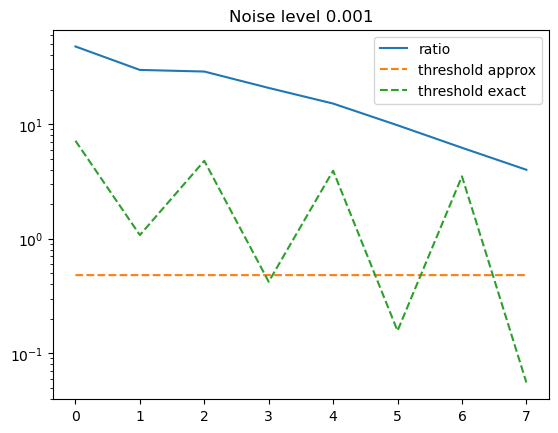

Noise level 	 order 	 	 ratio 	 	 threshold approx	 threshold exact
0.01
5.33109255026126
	  	 2 	 	 5.106e+00 	 4.921e-02 	 	 7.504e-01
	  	 3 	 	 3.381e+00 	 4.921e-02 	 	 1.166e-01
	  	 4 	 	 3.305e+00 	 4.921e-02 	 	 5.206e-01
	  	 5 	 	 2.668e+00 	 4.921e-02 	 	 4.858e-02
	  	 6 	 	 2.423e+00 	 4.921e-02 	 	 5.024e-01
	  	 7 	 	 2.630e+00 	 4.921e-02 	 	 2.605e-02
	  	 8 	 	 3.663e+00 	 4.921e-02 	 	 8.714e-01
	  	 9 	 	 5.926e+00 	 4.921e-02 	 	 2.245e-02


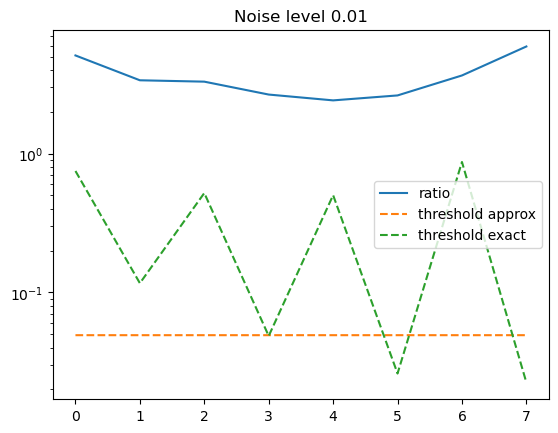

In [6]:
M=infinity_norm(uxxx)
number_noise=10 #<=10
noise_levels = [0]+[10**(-10+i) for i in range(0,number_noise-1)]
orders=range(2,10,1)
print(f"True ratio: {sv_max/sv_min:3.3e}")
unorm2=np.sqrt(np.mean(np.square(u)))

for target_noise in noise_levels:
    print("Noise level \t order \t \t ratio \t \t threshold approx\t threshold exact")
    print(f"{target_noise}")
    threshold_list = []
    threshold2_list = []
    ratio_list=[]
    
    var = target_noise * unorm2
    noise = np.random.normal(0, var, size=u.shape)
    print(np.linalg.norm(noise))
    u_noise = u + noise
    eps_infty = infinity_norm(u-u_noise)
    eps_two = np.linalg.norm(u-u_noise)
    
    for order in orders:          
        ux_noise = ps.FiniteDifference(order=order,d=1, axis=0, drop_endpoints=False)._differentiate(u_noise, dx)
        u_flat_noise, u_x_flat_noise = u_noise.flatten(), ux_noise.flatten()
        g_noise = np.concatenate([u_flat_noise.reshape(len(u_flat_noise),1), u_x_flat_noise.reshape(len(u_flat_noise),1)], axis=1)
        sv = svd(g_noise, compute_uv=False)
        
        ratio=sv[0]/sv[-1]
        threshold = calc_threshold_nonuniq_approx(eps_infty,dx,order)
        threshold_list.append(threshold)
        threshold2 = calc_threshold_nonuniq_exact(sv[0],eps_two,eps_infty,dx,true_g.shape[0],M,order)
        threshold2_list.append(threshold2)
        ratio_list.append(ratio)
        
        print(f"\t  \t {order} \t \t {ratio:3.3e} \t {threshold:3.3e} \t \t {threshold2:3.3e}")

    plt.title(f"Noise level {target_noise}")
    plt.plot(ratio_list,label=f'ratio')
    plt.plot(threshold_list,'--',label=f'threshold approx')
    plt.plot(threshold2_list,'--',label=f'threshold exact')
    plt.yscale('log')
    plt.legend()
    plt.show()

### Uniqueness

##### We try a threshold for unique values
We choose $C_1>0$ and $C_2>0$ such that $\sigma_1 \leq C_1 ,\sigma_n \geq \frac{1}{C_2}  $. Then
$$\frac{\tilde\sigma_1}{\tilde\sigma_n} \leq C_1 C_2+ C_2 \sqrt{1 + (C_2 C_1)^2}\|G-\tilde{G}\|_F \leq C_1 C_2+ C_2 \sqrt{1 + (C_2 C_1)^2}\sqrt{E}$$
The ideal $C_1, C_2$ would be $C_1 = \sigma_1, C_2 = \frac{1}{\sigma_n}$. However, in practice we do not know the true singular valuse. Thus, we can educately guess these bounds with:
$$C_1=\tilde\sigma_1+\sqrt{eps/h+h^{order}}, \ C_2=\frac{1}{\tilde\sigma_n-\sqrt{eps/h+h^{order}}}$$
This approximates deviation we get from the derivative calculation.

In [7]:
"""
u: function with noise
eps: noise estimation infinity_norm(u-u_noise)
"""
def educated_guess_c1c2(u,eps,h):
    #Calculate omin omax
    ux= ps.FiniteDifference(order=2,d=1, axis=0, drop_endpoints=False)._differentiate(u, h)
    u_flat, u_x_flat = u.flatten(), ux.flatten()
    g = np.concatenate([u_flat.reshape(len(u_flat),1), u_x_flat.reshape(len(u_flat),1)], axis=1)
    sv = svd(g, compute_uv=False)
    omax,omin = sv[0],sv[-1]
    print(omax,omin)
    #Calculate C1,C2    
    E = (eps/h+h**order)
    C1= omax+ np.sqrt(E)
    assert omin - np.sqrt(E) >0
    C2= 1/(omin - np.sqrt(E))
    return C1,C2

"""
This calculates the threshold with minimal knowlegdede
C1: upper bound o1 <= C1
C2: lower bound on >= 1/C2
eps: noise estimation infinity_norm(u-u_noise)
h: dx
order: order of the derivative caluclation
"""
def calc_threshold_uniq_approx(C1,C2,eps,h,order=2):
    E = (eps/h+h**order)
    T = C1*C2 + C2*np.sqrt(1+ (C1*C2)**2)*np.sqrt(E)
    return T
"""
This function calculates the threshold with all constants (we do not normally know)
"""
def calc_threshold_uniq_exact(C1,C2,eps_two,eps_infty,M,h,number_datapoints,order=2):
    E = error_bound_g(eps_two,eps_infty,h,number_datapoints,M,order)
    T = C1*C2 + C2*np.sqrt(1+ (C1*C2)**2)*np.sqrt(E)
    return T

In [8]:
n_samples=100
T,X,t,x = create_data_2d(T_start=0, T_end=1, L_x_start=-2,L_x_end=3, N_t=n_samples, N_x=n_samples)
a=np.random.randn()*1e-6
b=np.random.randn()*1e-3
C=0.1
"""
u = np.cos(X-a*T)*C
ux = -np.sin(X-a*T)*C
uxx = -np.cos(X-a*T)*C
uxxx = np.sin(X-a*T)*C
ut = a*np.sin(X-a*T)*C
"""
"""
u=(X+b*T)*np.exp(a*T)
ux = np.exp(a*T)
uxx= 1
uxxx= 0
ut= b*np.exp(a*T) + a*(X*+b*T)*np.exp(a*T) #bux + aut
"""
u = np.exp(X-a*T)
ux = u
uxx = u
uxxx = u
ut = -a*u

dx=x[1]-x[0]

In [9]:
u_flat, ux_flat = u.flatten(), ux.flatten()
true_g = np.concatenate([u_flat.reshape(len(u_flat),1), ux_flat.reshape(len(ux_flat),1)], axis=1)
sv = svd(true_g, compute_uv=False)
sv_max,sv_min=sv[0],sv[-1]
print(f"M: {np.max(u)}")
print(f"Singular values of g: {sv_max,sv_min}")
print(f"sv_max/sv_min: {sv_max/sv_min:3.3e}")

M: 20.085536923187668
Singular values of g: (916.3929031613239, 1.751172468002547e-13)
sv_max/sv_min: 5.233e+15


In [10]:
#Best choice C1 C2
C1=sv_max
C2=1/sv_min
print(f"C1: {C1}, C2: {C2}")

C1: 916.3929031613239, C2: 5710459810624.121


True ratio: 5.233e+15
Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
0
0.0
916.5329789281337 0.16795302932072695
C1: 916.5329803903333, C2: 5.954097464767678
	  	 2 	 	 5.457e+03 	 7.098e+03 	 	 3.320e+04
	  	 3 	 	 2.292e+05 	 5.826e+03 	 	 7.559e+03
	  	 4 	 	 5.918e+06 	 5.540e+03 	 	 5.471e+03
	  	 5 	 	 1.224e+08 	 5.476e+03 	 	 5.461e+03
	  	 6 	 	 3.050e+09 	 5.461e+03 	 	 5.457e+03
	  	 7 	 	 7.531e+10 	 5.458e+03 	 	 5.457e+03
	  	 8 	 	 1.616e+12 	 5.457e+03 	 	 5.457e+03
	  	 9 	 	 1.442e+13 	 5.457e+03 	 	 5.457e+03


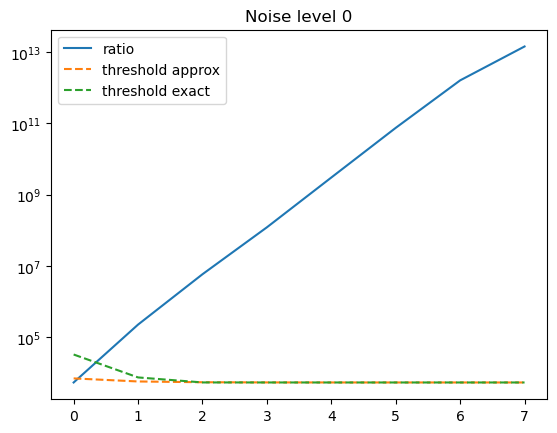

Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
1e-10
6.411701460621209e-08
916.5329789231946 0.16795304409092768
C1: 916.5331968994803, C2: 5.961782548425742
	  	 2 	 	 5.457e+03 	 7.110e+03 	 	 3.328e+04
	  	 3 	 	 2.292e+05 	 5.836e+03 	 	 7.573e+03
	  	 4 	 	 5.916e+06 	 5.555e+03 	 	 5.479e+03
	  	 5 	 	 1.185e+08 	 5.505e+03 	 	 5.470e+03
	  	 6 	 	 4.467e+08 	 5.501e+03 	 	 5.464e+03
	  	 7 	 	 3.081e+08 	 5.501e+03 	 	 5.471e+03
	  	 8 	 	 2.013e+08 	 5.501e+03 	 	 5.464e+03
	  	 9 	 	 1.247e+08 	 5.501e+03 	 	 5.485e+03


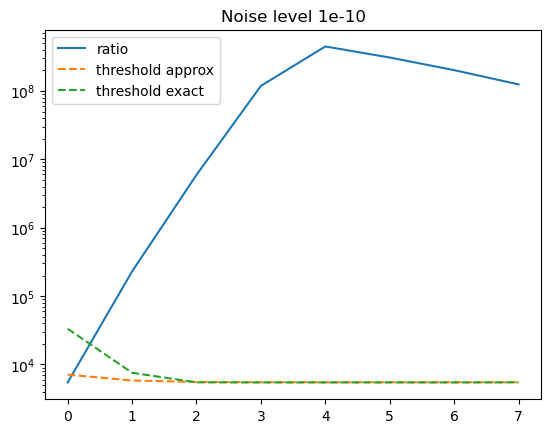

Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
1e-09
6.446675586599399e-07
916.5329789719801 0.1679529742690086
C1: 916.5337090608355, C2: 5.980042728757009
	  	 2 	 	 5.457e+03 	 7.140e+03 	 	 3.347e+04
	  	 3 	 	 2.292e+05 	 5.871e+03 	 	 7.613e+03
	  	 4 	 	 5.883e+06 	 5.625e+03 	 	 5.498e+03
	  	 5 	 	 5.180e+07 	 5.600e+03 	 	 5.514e+03
	  	 6 	 	 4.630e+07 	 5.598e+03 	 	 5.484e+03
	  	 7 	 	 3.093e+07 	 5.598e+03 	 	 5.561e+03
	  	 8 	 	 1.966e+07 	 5.598e+03 	 	 5.485e+03
	  	 9 	 	 1.173e+07 	 5.598e+03 	 	 5.717e+03


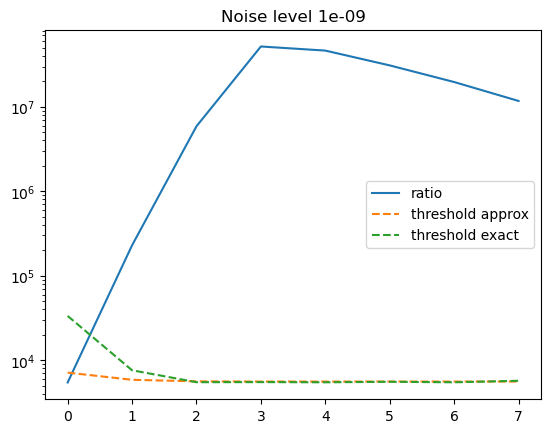

Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
1e-08
6.494618634880994e-06
916.5329804209194 0.1679499766699891
C1: 916.5351860906349, C2: 6.033389733706146
	  	 2 	 	 5.457e+03 	 7.257e+03 	 	 3.403e+04
	  	 3 	 	 2.293e+05 	 6.065e+03 	 	 7.796e+03
	  	 4 	 	 4.803e+06 	 5.918e+03 	 	 5.569e+03
	  	 5 	 	 5.688e+06 	 5.909e+03 	 	 5.810e+03
	  	 6 	 	 4.411e+06 	 5.908e+03 	 	 5.560e+03
	  	 7 	 	 2.964e+06 	 5.908e+03 	 	 6.277e+03
	  	 8 	 	 1.932e+06 	 5.908e+03 	 	 5.564e+03
	  	 9 	 	 1.202e+06 	 5.908e+03 	 	 7.720e+03


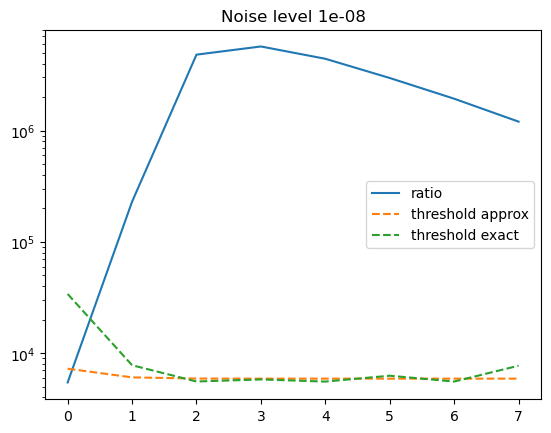

Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
1e-07
6.434819873726542e-05
916.5329736760889 0.16797270503107234
C1: 916.5403322529376, C2: 6.226102344276306
	  	 2 	 	 5.456e+03 	 7.904e+03 	 	 3.624e+04
	  	 3 	 	 2.193e+05 	 7.037e+03 	 	 9.287e+03
	  	 4 	 	 7.992e+05 	 6.978e+03 	 	 6.011e+03
	  	 5 	 	 6.013e+05 	 6.975e+03 	 	 8.994e+03
	  	 6 	 	 4.879e+05 	 6.975e+03 	 	 6.059e+03
	  	 7 	 	 3.338e+05 	 6.975e+03 	 	 1.456e+04
	  	 8 	 	 2.162e+05 	 6.975e+03 	 	 6.107e+03
	  	 9 	 	 1.298e+05 	 6.975e+03 	 	 3.166e+04


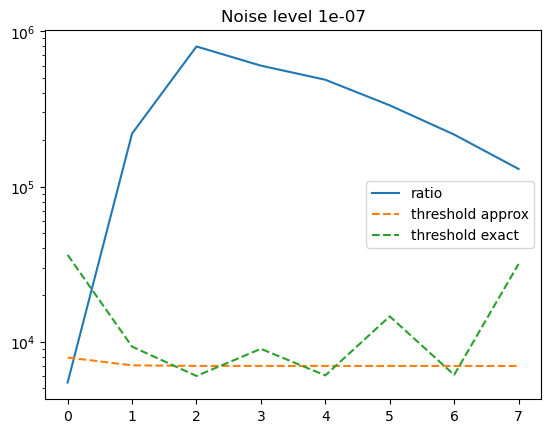

Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
1e-06
0.0006488488667161561
916.5330519813448 0.16795377821750698
C1: 916.556041710188, C2: 6.898262047149032
	  	 2 	 	 5.457e+03 	 1.173e+04 	 	 4.587e+04
	  	 3 	 	 7.396e+04 	 1.129e+04 	 	 2.451e+04
	  	 4 	 	 8.149e+04 	 1.127e+04 	 	 9.800e+03
	  	 5 	 	 6.001e+04 	 1.127e+04 	 	 4.567e+04
	  	 6 	 	 4.761e+04 	 1.127e+04 	 	 1.055e+04
	  	 7 	 	 3.175e+04 	 1.127e+04 	 	 1.124e+05
	  	 8 	 	 2.010e+04 	 1.127e+04 	 	 1.113e+04
	  	 9 	 	 1.197e+04 	 1.127e+04 	 	 3.173e+05


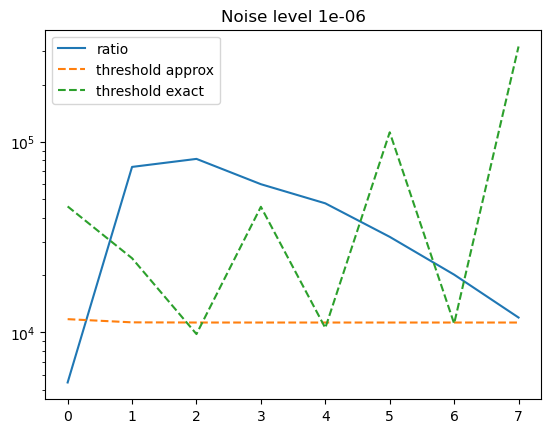

Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
1e-05
0.006521362301485751
916.5338514331851 0.18097683481503518
C1: 916.6039974908779, C2: 9.022764488040144
	  	 2 	 	 5.064e+03 	 3.535e+04 	 	 1.087e+05
	  	 3 	 	 7.654e+03 	 3.510e+04 	 	 2.579e+05
	  	 4 	 	 7.983e+03 	 3.509e+04 	 	 6.338e+04
	  	 5 	 	 5.791e+03 	 3.508e+04 	 	 6.349e+05
	  	 6 	 	 4.548e+03 	 3.508e+04 	 	 7.559e+04
	  	 7 	 	 3.086e+03 	 3.508e+04 	 	 1.698e+06
	  	 8 	 	 2.039e+03 	 3.508e+04 	 	 8.477e+04
	  	 9 	 	 1.277e+03 	 3.508e+04 	 	 4.962e+06


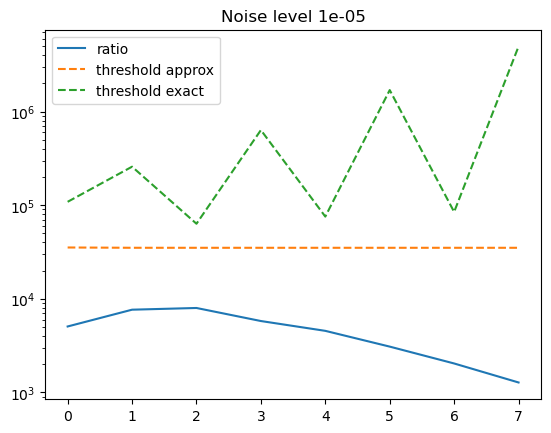

Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
0.0001
0.0654515554237576
916.5198526729986 0.737956034606818
C1: 916.7537333163024, C2: 1.9838302310592018
	  	 2 	 	 1.242e+03 	 5.930e+03 	 	 2.464e+04
	  	 3 	 	 7.730e+02 	 5.926e+03 	 	 1.336e+05
	  	 4 	 	 8.103e+02 	 5.926e+03 	 	 3.142e+04
	  	 5 	 	 5.955e+02 	 5.926e+03 	 	 3.386e+05
	  	 6 	 	 4.808e+02 	 5.926e+03 	 	 3.800e+04
	  	 7 	 	 3.306e+02 	 5.926e+03 	 	 9.100e+05
	  	 8 	 	 2.179e+02 	 5.926e+03 	 	 4.294e+04
	  	 9 	 	 1.336e+02 	 5.926e+03 	 	 2.664e+06


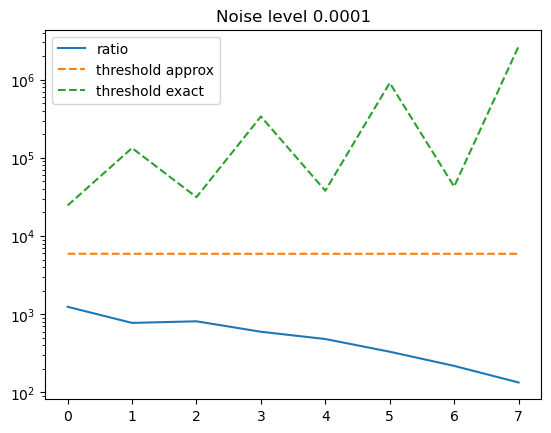

Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
0.001
0.6563063021624553
916.5926824640851 7.159477887355769
C1: 917.312853071144, C2: 0.1552962075687582
	  	 2 	 	 1.280e+02 	 2.222e+02 	 	 1.309e+03
	  	 3 	 	 7.714e+01 	 2.222e+02 	 	 7.793e+03
	  	 4 	 	 8.400e+01 	 2.222e+02 	 	 1.864e+03
	  	 5 	 	 6.240e+01 	 2.222e+02 	 	 1.973e+04
	  	 6 	 	 5.100e+01 	 2.222e+02 	 	 2.246e+03
	  	 7 	 	 3.410e+01 	 2.222e+02 	 	 5.295e+04
	  	 8 	 	 2.158e+01 	 2.222e+02 	 	 2.533e+03
	  	 9 	 	 1.274e+01 	 2.222e+02 	 	 1.549e+05


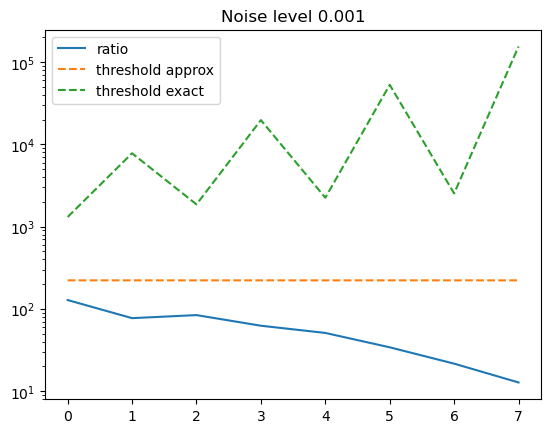

Noise level 	 order 	 	 ratio 	 	 threshold approx 	 threshold exact
0.01
6.448953245161827
918.732587024983 70.75335767583837
C1: 921.0470317652884, C2: 0.014611570480991765
	  	 2 	 	 1.299e+01 	 1.569e+01 	 	 1.193e+02
	  	 3 	 	 7.904e+00 	 1.569e+01 	 	 7.176e+02
	  	 4 	 	 8.381e+00 	 1.569e+01 	 	 1.719e+02
	  	 5 	 	 6.252e+00 	 1.569e+01 	 	 1.816e+03
	  	 6 	 	 5.092e+00 	 1.569e+01 	 	 2.071e+02
	  	 7 	 	 3.568e+00 	 1.569e+01 	 	 4.874e+03
	  	 8 	 	 2.585e+00 	 1.569e+01 	 	 2.335e+02
	  	 9 	 	 2.340e+00 	 1.569e+01 	 	 1.426e+04


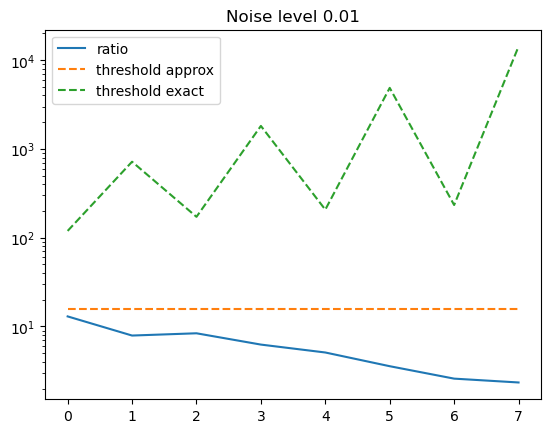

In [11]:
M=infinity_norm(uxxx)
number_noise=10 #<=10
noise_levels = [0]+[10**(-10+i) for i in range(0,number_noise-1)]
orders=range(2,10,1)
print(f"True ratio: {sv_max/sv_min:3.3e}")
unorm2=np.sqrt(np.mean(np.square(u)))


for target_noise in noise_levels:
    print("Noise level \t order \t \t ratio \t \t threshold approx \t threshold exact")
    print(f"{target_noise}")
    
    threshold_list = []
    threshold2_list = []
    ratio_list=[]
    
    var = target_noise * unorm2
    noise = np.random.normal(0, var, size=u.shape)
    print(np.linalg.norm(noise))
    u_noise = u + noise
    eps_two = np.linalg.norm(u-u_noise)
    eps_infty = infinity_norm(u-u_noise)

    #Educated guess for C1 C2
    C1,C2 = educated_guess_c1c2(u_noise,eps_infty,dx)
    print(f"C1: {C1}, C2: {C2}")
    for order in orders:        
        ux_noise = ps.FiniteDifference(order=order,d=1, axis=0, drop_endpoints=False)._differentiate(u_noise, dx)
        u_flat_noise, u_x_flat_noise = u_noise.flatten(), ux_noise.flatten()
        g_noise = np.concatenate([u_flat_noise.reshape(len(u_flat_noise),1), u_x_flat_noise.reshape(len(u_flat_noise),1)], axis=1)
        sv = svd(g_noise, compute_uv=False)
        ratio=sv[0]/sv[-1]
        
        threshold = calc_threshold_uniq_approx(C1,C2,eps_two,dx,order)
        threshold2 = calc_threshold_uniq_exact(C1,C2,eps_two,eps_infty,M,dx,true_g.shape[0],order)
        threshold_list.append(threshold)
        threshold2_list.append(threshold2)
        ratio_list.append(ratio)

        
        print(f"\t  \t {order} \t \t {ratio:3.3e} \t {threshold:3.3e} \t \t {threshold2:3.3e}")
    plt.title(f"Noise level {target_noise}")
    plt.plot(ratio_list,label=f'ratio')
    plt.plot(threshold_list,'--',label='threshold approx')
    plt.plot(threshold2_list,'--',label='threshold exact')
    plt.yscale('log')
    plt.legend()
    plt.show()

### Combine non uniqueness and uniqueness bound

In [12]:
n_samples=100
T,X,t,x = create_data_2d(T_start=0, T_end=1, L_x_start=-2,L_x_end=3, N_t=n_samples, N_x=n_samples)
a=np.random.randn()
b=np.random.randn()
C=1

u = np.cos(X-a*T)*C
ux = -np.sin(X-a*T)*C
uxx = -np.cos(X-a*T)*C
uxxx = np.sin(X-a*T)*C
ut = a*np.sin(X-a*T)*C

"""
u=(X+b*T)*np.exp(a*T)
ux = np.exp(a*T)
uxx= 1
uxxx= 0
ut= b*np.exp(a*T) + a*(X*+b*T)*np.exp(a*T) #bux + aut

u = np.exp(X-a*T)
ux = u
uxx = u
uxxx = u
ut = -a*u
"""
dx=x[1]-x[0]

u_flat, ux_flat = u.flatten(), ux.flatten()
true_g = np.concatenate([u_flat.reshape(len(u_flat),1), ux_flat.reshape(len(ux_flat),1)], axis=1)
sv = svd(true_g, compute_uv=False)
frobenius_norm_trueg = np.linalg.norm(true_g)
sv_max,sv_min=sv[0],sv[-1]
print(f"M: {np.max(u)}")
print(f"Singular values of g: {sv_max,sv_min}")
print(f"sv_max/sv_min: {sv_max/frobenius_norm_trueg:3.3f}")

M: 0.9999999960945072
Singular values of g: (76.75452559974566, 64.09947581656175)
sv_max/sv_min: 0.768


True ratio: 1.197e+00
0.0
C: 64.09947581656175, Check 


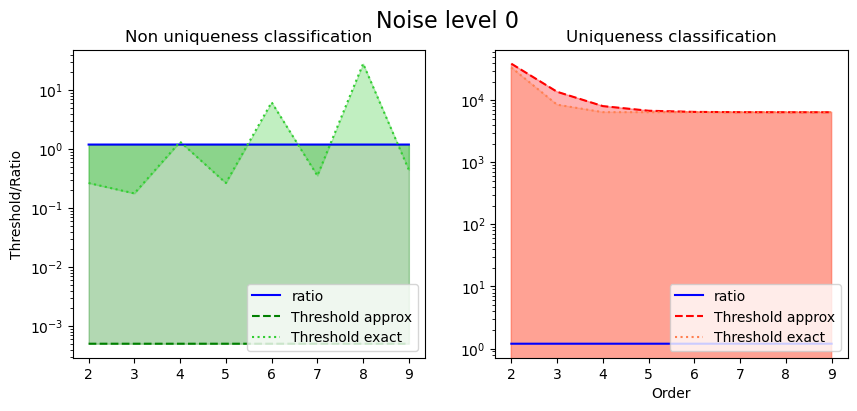

6.461092846509731e-09
C: 64.09947581656175, Check 


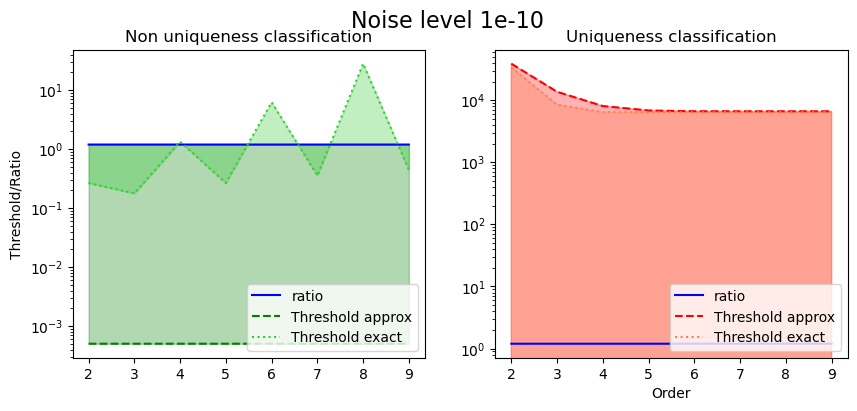

6.44875634616426e-08
C: 64.09947581656175, Check 


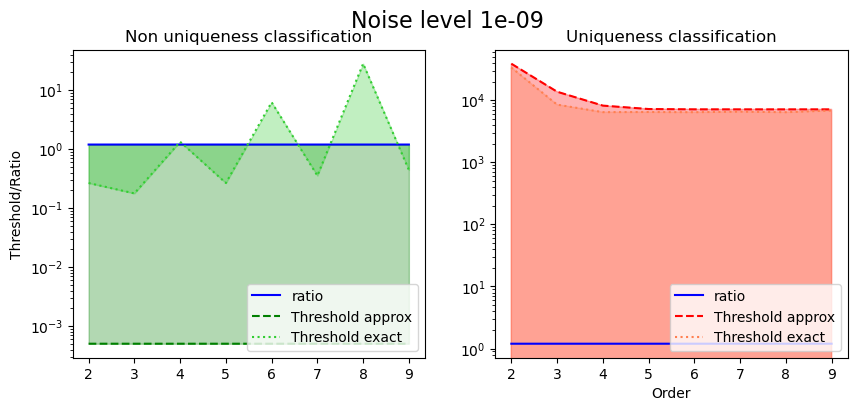

6.478285369380772e-07
C: 64.09947581656175, Check 


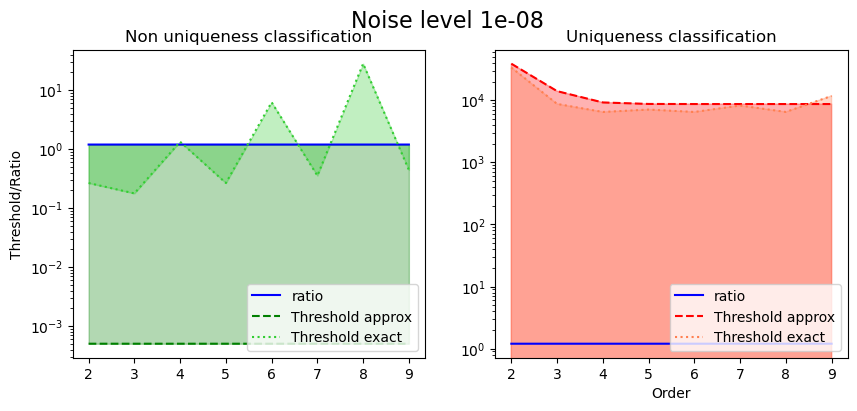

6.484672349996389e-06
C: 64.09947581656175, Check 


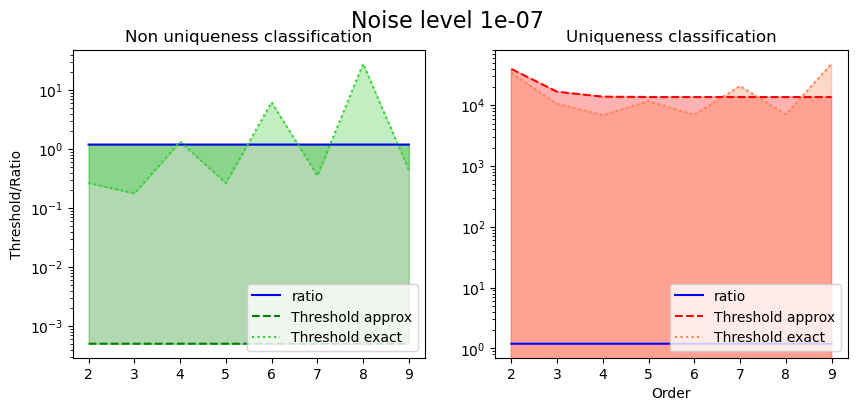

6.572320979423069e-05
C: 64.09947581656175, Check 


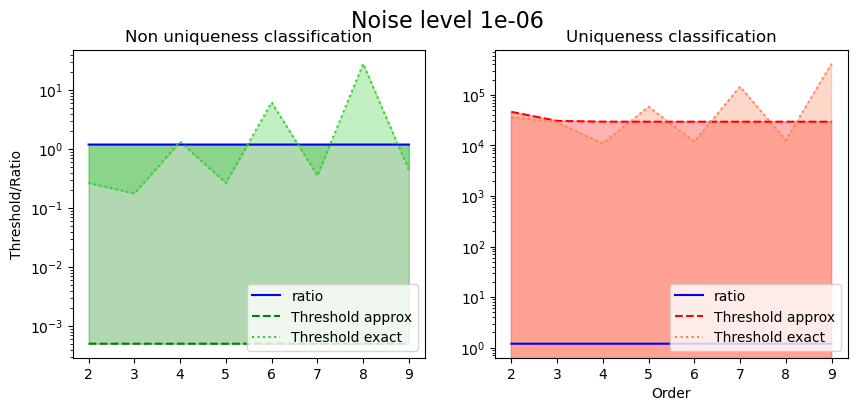

0.0006475501482179283
C: 64.09947581656175, Check 


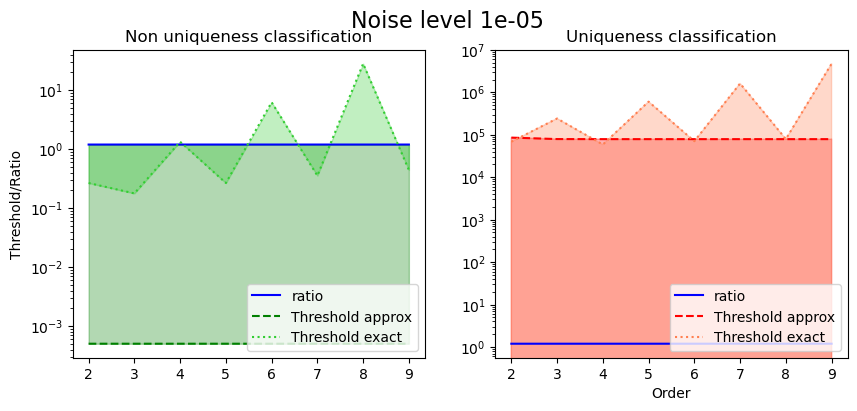

0.0063956084954074
C: 64.09947581656175, Check 


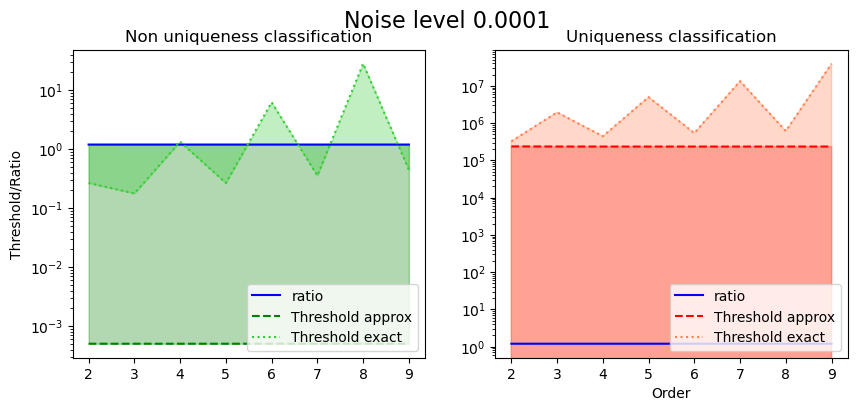

0.06545114549564453
C: 64.09947581656175, Check 


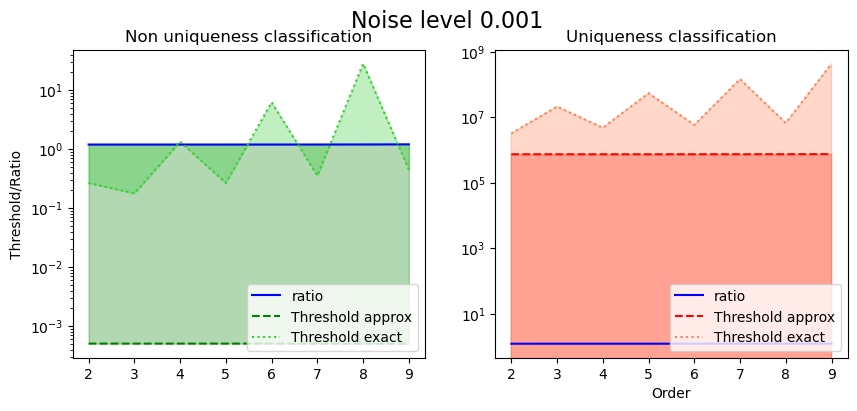

0.6571421133686267
C: 64.09947581656175, Check 


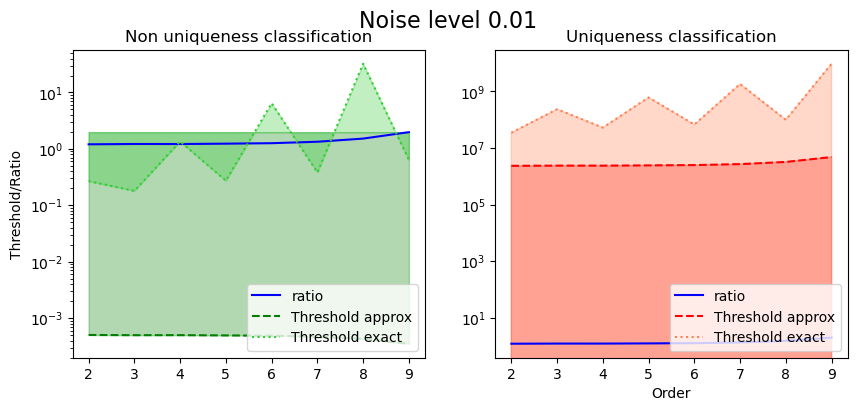

In [13]:
M=infinity_norm(uxxx)
number_noise=10 #<=10
noise_levels = [0]+[10**(-10+i) for i in range(0,number_noise-1)]
orders=range(2,10,1)
print(f"True ratio: {sv_max/sv_min:3.3e}")
unorm2=np.sqrt(np.mean(np.square(u)))
C=sv_min

for target_noise in noise_levels:
    
    threshold_uniq_list = []
    threshold2_uniq_list = []
    threshold_nonunique_list = []
    threshold2_nonunique_list = []
    ratio_list=[]
    
    var = target_noise * unorm2
    noise = np.random.normal(0, var, size=u.shape)
    print(np.linalg.norm(noise))
    u_noise = u + noise
    eps_two = np.linalg.norm(u-u_noise)
    eps_infty = infinity_norm(u-u_noise)

    #Educated guess for C1 C2
    #C = educated_guess_c(u_noise,eps_infty,dx)
    print(f"C: {C}, Check ")
    for order in orders:        
        ux_noise = ps.FiniteDifference(order=order,d=1, axis=0, drop_endpoints=False)._differentiate(u_noise, dx)
        u_flat_noise, u_x_flat_noise = u_noise.flatten(), ux_noise.flatten()
        g_noise = np.concatenate([u_flat_noise.reshape(len(u_flat_noise),1), u_x_flat_noise.reshape(len(u_flat_noise),1)], axis=1)
        sv = svd(g_noise, compute_uv=False)
        frobenius_norm_gnoise=np.linalg.norm(g_noise)
        
        ratio=sv[0]/sv[-1]  
        
        threshold_uniq = calc_threshold_uniq_approx(C,frobenius_norm_gnoise,eps_two,dx,order)
        threshold2_uniq = calc_threshold_uniq_exact(C,frobenius_norm_gnoise,eps_two,eps_infty,M,dx,true_g.shape[0],order)
        threshold_uniq_list.append(threshold_uniq)
        threshold2_uniq_list.append(threshold2_uniq)
  
        threshold_nonunique = calc_threshold_nonuniq_approx(frobenius_norm_gnoise,dx,order)
        threshold2_nonunique = calc_threshold_nonuniq_exact(frobenius_norm_gnoise,eps_two,eps_infty,M,dx,true_g.shape[0],order)
        threshold_nonunique_list.append(threshold_nonunique)
        threshold2_nonunique_list.append(threshold2_nonunique)
        
        ratio_list.append(ratio)

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
    fig.suptitle(f'Noise level {target_noise}', fontsize=16)
    
    # Subplot 1: ratio and green lines
    ax1.set_title("Non uniqueness classification")
    ax1.plot(orders, ratio_list, label='ratio', color='blue')
    ax1.plot(orders, threshold_nonunique_list, '--', label='Threshold approx', color='green')
    ax1.plot(orders, threshold2_nonunique_list, ':', label='Threshold exact', color='limegreen')
    ax1.fill_between(orders, threshold_nonunique_list, y2=np.max(ratio_list), color='green', alpha=0.3)
    ax1.fill_between(orders, threshold2_nonunique_list, y2=np.max(ratio_list), color='limegreen', alpha=0.3)
    ax1.set_yscale('log')
    ax1.set_ylabel('Threshold/Ratio')
    
    # Subplot 2: ratio and red lines
    ax2.set_title("Uniqueness classification")
    ax2.plot(orders, ratio_list, label='ratio', color='blue')
    ax2.plot(orders, threshold_uniq_list, '--', label='Threshold approx', color='red')
    ax2.plot(orders, threshold2_uniq_list, ':', label='Threshold exact', color='coral')
    ax2.fill_between(orders, threshold_uniq_list, color='red', alpha=0.3)
    ax2.fill_between(orders, threshold2_uniq_list, color='coral', alpha=0.3)
    ax2.set_yscale('log')

    
    ax2.set_xlabel('Order')
    ax1.legend(loc=4)
    ax2.legend(loc=4)
    
    plt.show()